파일 > 드라이브에 사본저장하기 
하여 사본 파일로 실습 진행하기 바랍니다.


(해당파일은 구글 드라이브 colab notebooks 에 저장됩니다.)

---



# Keras

Keras is an open-source neural-network library written in Python.

Simple. Flexible. Powerful.

In [ ]:
import  tensorflow.keras
tensorflow.keras.__version__

'2.6.0'

In [ ]:
### XOR GATE

from tensorflow.keras import models
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

network = models.Sequential()
network.add(layers.Dense(2, input_shape = (2,),
                         activation='sigmoid',
                         kernel_initializer='glorot_uniform'))
network.add(layers.Dense(1, activation='sigmoid',
                         kernel_initializer='glorot_uniform'))
network.compile(optimizer='adam',
                loss='mse', metrics=['accuracy'])

h=network.fit(X, y, epochs=10000, verbose=0)

print(network.predict(X).round())

plt.figure()
plt.clf()

[[0.]
 [1.]
 [1.]
 [1.]]


<Figure size 432x288 with 0 Axes>

# MNIST (Modified National Institute of Standards and Technology database) 

머신 러닝 커뮤니티에서 가장 일반적으로 사용하는 데이터셋 중 하나는 MNIST 입니다. 이 데이터셋은 머신 러닝의 역사만큼 오래되었고 많은 연구에 사용되었습니다. 이 데이터셋은 1980년대에 미국 국립표준기술연구소에서 수집한 6만 개의 훈련 이미지와 1만 개의 테스트 이미지로 구성되어 있습니다. 코딩을 경험해보았다면, MNIST 문제를 알고리즘이 제대로 작동하는지 확인하기 위한 딥러닝계의 ‘Hello World’라고 생각해도 됩니다. 

## MNIST data

In [ ]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

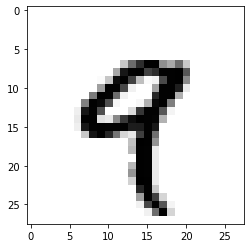

In [ ]:
import matplotlib.pyplot as plt
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## MLP (Multi-layer Perceptron)

신경망의 핵심 구성 요소는 일종의 데이터 처리 필터라고 생각할 수 있는 층입니다. 어떤 데이터가 들어가면 더 유용한 형태로 출력됩니다. 조금 더 구체적으로 층은 주어진 문제에 더 의미 있는 표현을 입력된 데이터로부터 추출합니다. 대부분의 딥러닝은 간단한 층을 연결하여 구성되어 있고, 점진적으로 데이터를 정제하는 형태를 띠고 있습니다. 딥러닝 모델은 데이터 정제 필터(층)가 연속되어 있는 데이터 프로세싱을 위한 여과기와 같습니다.

이 예에서는 조밀하게 연결된 (또는 완전 연결된) 신경망 층인 Dense 층 2개가 연속되어 있습니다. 두 번째 (즉, 마지막) 층은 10개의 확률 점수가 들어 있는 배열(모두 더하면 1입니다)을 반환하는 소프트맥스 층입니다. 각 점수는 현재 숫자 이미지가 10개의 숫자 클래스 중 하나에 속할 확률입니다.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

In [ ]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

훈련을 시작하기 전에 데이터를 네트워크에 맞는 크기로 바꾸고 모든 값을 0과 1 사이로 스케일을 조정합니다. 예를 들어, 앞서 우리의 훈련 이미지는 [0, 255] 사이의 값인 uint8 타입의 (60000, 28, 28) 크기를 가진 배열로 저장되어 있습니다. 이 데이터를 0과 1 사이의 값을 가지는 float32 타입의 (60000, 28 * 28) 크기의 배열로 바꿉니다

In [ ]:
train_images = train_images.reshape((-1, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((-1, 28 * 28))
test_images = test_images.astype('float32') / 255

from tensorflow.keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

이제 신경망을 훈련시킬 준비가 되었습니다. 케라스에서는 fit 메서드를 호출하여 훈련 데이터에 모델을 학습시킵니다:

In [ ]:
h = network.fit(train_images, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 5ms/step - loss: 0.2846 - accuracy: 0.9179 - val_loss: 0.1639 - val_accuracy: 0.9524
Epoch 2/10
375/375 [==============================] - 2s 5ms/step - loss: 0.1178 - accuracy: 0.9657 - val_loss: 0.1112 - val_accuracy: 0.9678
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0761 - accuracy: 0.9775 - val_loss: 0.0998 - val_accuracy: 0.9718
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0548 - accuracy: 0.9840 - val_loss: 0.0877 - val_accuracy: 0.9744
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0415 - accuracy: 0.9879 - val_loss: 0.0849 - val_accuracy: 0.9756
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0312 - accuracy: 0.9909 - val_loss: 0.0788 - val_accuracy: 0.9772
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0234 - accuracy: 0.9931 - val_loss: 0.0943 - val_accuracy: 0.9764
Epoch 

훈련하는 동안 두 개의 정보가 출력됩니다. 훈련 데이터에 대한 네트워크의 손실과 정확도입니다.

이제 테스트 세트에서도 모델이 잘 작동하는지 확인해 보겠습니다:

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0726 - accuracy: 0.9810
test_acc: 0.9810000061988831


In [ ]:
import matplotlib.pyplot as plt

def plot_acc(h, title="accuracy"):
    plt.plot(h.history['accuracy'])
    plt.plot(h.history ['val_accuracy'])
    plt.title(title)
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)

def plot_loss(h, title="loss"):
    plt.plot(h.history ['loss'])
    plt.plot(h.history ['val_loss'])
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training', 'Validation'], loc=0)


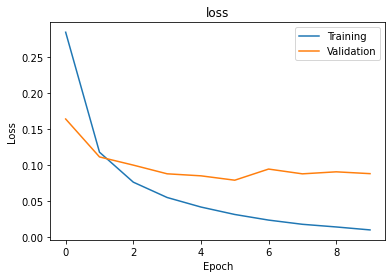

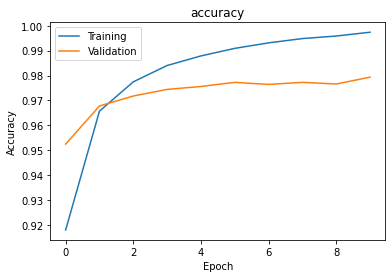

<Figure size 432x288 with 0 Axes>

In [ ]:
plot_loss(h)
plt.show()
plt.clf()

plot_acc(h)
plt.show()
plt.clf()

In [ ]:
h.history

{'accuracy': [0.9179166555404663,
  0.9656875133514404,
  0.9774583578109741,
  0.9840208292007446,
  0.9878749847412109,
  0.9909166693687439,
  0.9931250214576721,
  0.9948541522026062,
  0.9958750009536743,
  0.9973958134651184],
 'loss': [0.28456637263298035,
  0.11778633296489716,
  0.07610297203063965,
  0.05478736385703087,
  0.041512686759233475,
  0.031173503026366234,
  0.023365885019302368,
  0.01751602813601494,
  0.013816624879837036,
  0.009702581912279129],
 'val_accuracy': [0.9524166584014893,
  0.9677500128746033,
  0.971750020980835,
  0.9744166731834412,
  0.9755833148956299,
  0.9772499799728394,
  0.9764166474342346,
  0.9772499799728394,
  0.9765833616256714,
  0.9793333411216736],
 'val_loss': [0.1639309525489807,
  0.11119372397661209,
  0.0998026430606842,
  0.08772820979356766,
  0.08490806072950363,
  0.07883016020059586,
  0.0943208709359169,
  0.08767436444759369,
  0.09048254042863846,
  0.08794283866882324]}

In [ ]:
# saving model
# 전체 모델을 HDF5 파일로 저장합니다
network.save('DNN_mnist.h5') # instance variable 'network'!

In [ ]:
# loading model
model_loaded=models.load_model('DNN_mnist.h5') # not instance!
model_loaded.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


## CNN (Convolutionl Neural Network)

In [ ]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [ ]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images.reshape((60000, 28, 28, 1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28, 28, 1))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

ImportError: ignored

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=5, batch_size=64)

테스트 데이터에서 모델을 평가해 보죠:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

In [ ]:
	
x=[1, 2, ['a', 'b'], [100]]

str(x)

In [ ]:
	
a = [1,2,['a','b'],[100]]


print('[',a,']')


In [ ]:
stu03 = [ "Yoshua Bengio" ,  92 ,  88 ,  84 ]	
	
	
print(stu03[0].split(sep='  ')[1])


In [ ]:
numbers = [ 97 ,  45 ,  78 ,  23 ,  67 , 98 , 100 , 96 ,  79 , 59 ]

print (numbers[ 2 : 6 ])

In [ ]:
	
	
stars = ''

for i in range(5):

    stars+='*'


print(stars,stars)